In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\HP\Downloads\archive (17)\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
X=df.drop('target',axis=1)
y=df['target']

In [5]:
from sklearn.cluster import KMeans
clust=KMeans(n_clusters=4)
clust

KMeans(n_clusters=4)

In [6]:
labels=clust.fit_predict(X[X.columns])
labels

array([3, 3, 0, ..., 2, 2, 0])

In [7]:
#clusters
cluster=clust.cluster_centers_
print('Clusters are\n',cluster)

Clusters are
 [[5.68956044e+01 7.63736264e-01 5.65934066e-01 1.27384615e+02
  1.97236264e+02 8.79120879e-02 5.98901099e-01 1.26120879e+02
  4.78021978e-01 1.57747253e+00 1.13736264e+00 8.68131868e-01
  2.28021978e+00]
 [5.65692308e+01 5.28205128e-01 6.82051282e-01 1.36820513e+02
  3.23369231e+02 1.64102564e-01 5.28205128e-01 1.49256410e+02
  3.84615385e-01 1.26461538e+00 1.40000000e+00 9.58974359e-01
  2.41025641e+00]
 [5.60806045e+01 7.15365239e-01 9.89924433e-01 1.33370277e+02
  2.56002519e+02 1.71284635e-01 4.03022670e-01 1.47040302e+02
  3.55163728e-01 1.01838791e+00 1.34005038e+00 7.78337531e-01
  2.34005038e+00]
 [4.83864542e+01 7.45019920e-01 1.34262948e+00 1.27848606e+02
  2.05430279e+02 1.47410359e-01 6.81274900e-01 1.68956175e+02
  1.67330677e-01 6.38645418e-01 1.62549801e+00 4.74103586e-01
  2.26294821e+00]]


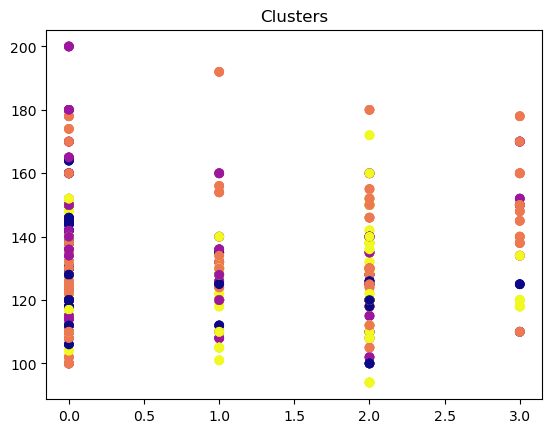

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X['cp'], X['trestbps'],c=labels,cmap='plasma')
plt.title('Clusters')
plt.savefig('Scatter plot1.png')

In [9]:
#insights
insight=X.groupby(labels).mean()
print(insight)

         age       sex        cp    trestbps        chol       fbs   restecg  \
0  56.895604  0.763736  0.565934  127.384615  197.236264  0.087912  0.598901   
1  56.569231  0.528205  0.682051  136.820513  323.369231  0.164103  0.528205   
2  56.080605  0.715365  0.989924  133.370277  256.002519  0.171285  0.403023   
3  48.386454  0.745020  1.342629  127.848606  205.430279  0.147410  0.681275   

      thalach     exang   oldpeak     slope        ca      thal  
0  126.120879  0.478022  1.577473  1.137363  0.868132  2.280220  
1  149.256410  0.384615  1.264615  1.400000  0.958974  2.410256  
2  147.040302  0.355164  1.018388  1.340050  0.778338  2.340050  
3  168.956175  0.167331  0.638645  1.625498  0.474104  2.262948  


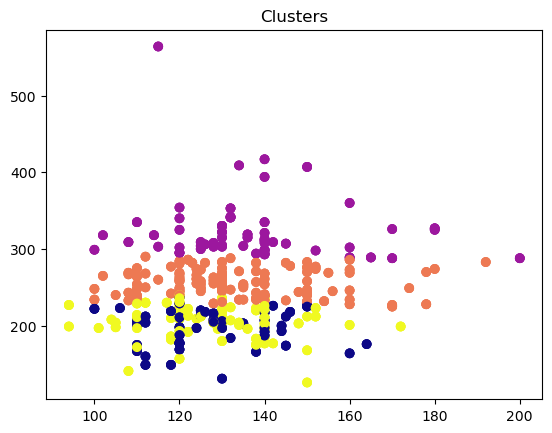

In [10]:
# Scatter plot between column 4 and 5
plt.scatter(X.iloc[:,3], X.iloc[:,4],c=labels,cmap='plasma')
plt.title('Clusters')
plt.savefig('Scatter plot 2.png')

In [11]:
# labels
labels=pd.DataFrame(labels)
labels.head()

,0
0,3
1,3
2,0
3,3
4,1


In [12]:
labels.value_counts()

0
2    397
3    251
1    195
0    182
Name: count, dtype: int64